<a href="https://colab.research.google.com/github/ayeshabaig575/FYP/blob/main/breast_cancer_image_calssification_effecientb3%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORT LIBRARIES**

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
import cv2
import numpy as np
import pandas as pd
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


# **DATA PATHS WITH LABEL**

In [ ]:
# Generate data paths with labels
data_dir = '/content/drive/MyDrive/Dataset_BUSI_with_GT'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
df

,filepaths,labels
0,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
1,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
2,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
3,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
4,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
...,...,...
1573,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,malignant
1574,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,malignant
1575,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,malignant
1576,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,malignant


In [ ]:
strat = df['labels']
train_df, test_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

In [ ]:
test_df

,filepaths,labels
133,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
481,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
372,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
605,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
571,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
...,...,...
1444,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,malignant
1413,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,malignant
726,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
218,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal


# **BATCH NORMALIZATION**

In [ ]:
# crobed image size
batch_size = 8
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 1262 validated image filenames belonging to 3 classes.
Found 316 validated image filenames belonging to 3 classes.


In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet",
                                                               input_shape= img_shape, pooling= 'max')


model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45),
    Dense(class_count, activation= 'softmax')
])


model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])



43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
epochs = 50   # number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= test_gen,
                    validation_steps= None, shuffle= True)

Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 31s 195ms/step - accuracy: 0.9878 - loss: 0.3848 - val_accuracy: 0.9399 - val_loss: 0.4880
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9768 - loss: 0.3896 - val_accuracy: 0.9335 - val_loss: 0.4521
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9776 - loss: 0.3818 - val_accuracy: 0.9430 - val_loss: 0.4681
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9728 - loss: 0.3718 - val_accuracy: 0.9367 - val_loss: 0.5012
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.9638 - loss: 0.3956 - val_accuracy: 0.9525 - val_loss: 0.4409
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.9773 - loss: 0.3551 - val_accuracy: 0.9494 - val_loss: 0.4344
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9638 - loss: 0.3993 - val_accuracy: 0.9304 - val_loss: 0.4683
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.9885 - loss: 0

In [ ]:
train_score = model.evaluate(train_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

158/158 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.9983 - loss: 0.1686
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9253 - loss: 0.4335
Train Loss:  0.16995196044445038
Train Accuracy:  0.9984152317047119
--------------------
Test Loss:  0.4019843339920044
Test Accuracy:  0.9335442781448364


In [ ]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step


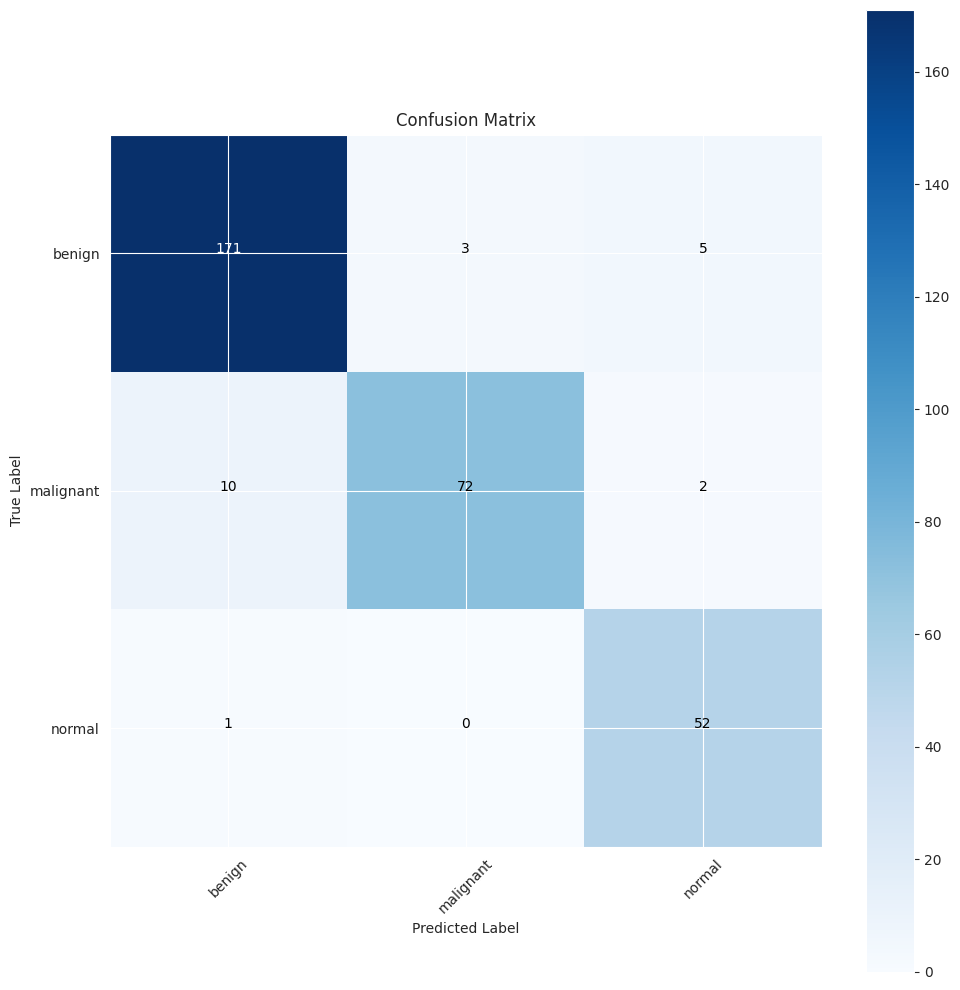

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      benign       0.94      0.96      0.95       179
   malignant       0.96      0.86      0.91        84
      normal       0.88      0.98      0.93        53

    accuracy                           0.93       316
   macro avg       0.93      0.93      0.93       316
weighted avg       0.94      0.93      0.93       316



In [ ]:
#Save the model
model.save('Model.h5')